In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
df=pd.read_csv("Pitchforkcleaned.csv",encoding = "ISO-8859-1")
df=df.drop('Unnamed: 0',axis=1)
df=df.loc[df['Reissue']==0]

In [3]:
presentyear=df.loc[df['Release Year']==2017]

In [4]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 5)
plt.figure(figsize=(10,5))

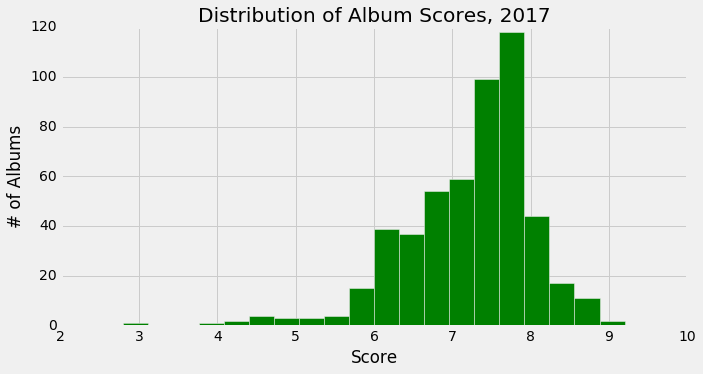

In [5]:
ax=presentyear['scores'].plot.hist(bins=20,title="Distribution of Album Scores, 2017",color='green')
ax.set_xlabel("Score")
ax.set_ylabel("# of Albums")

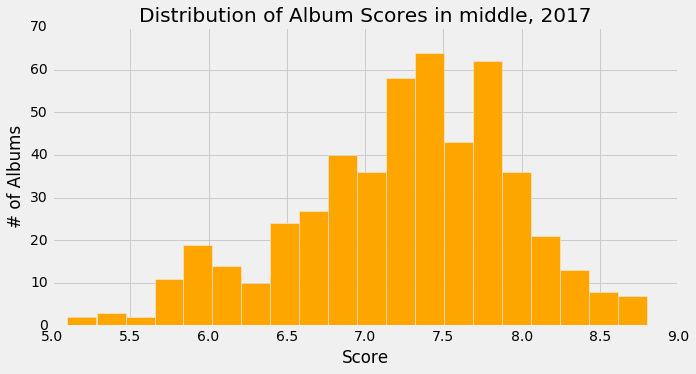

In [6]:
ax=presentyear.loc[(df['scores']>5.0) & (df['scores']<9.0),'scores'].plot.hist(bins=20,title="Distribution of Album Scores in middle, 2017",color='orange')
ax.set_xlabel("Score")
ax.set_ylabel("# of Albums")

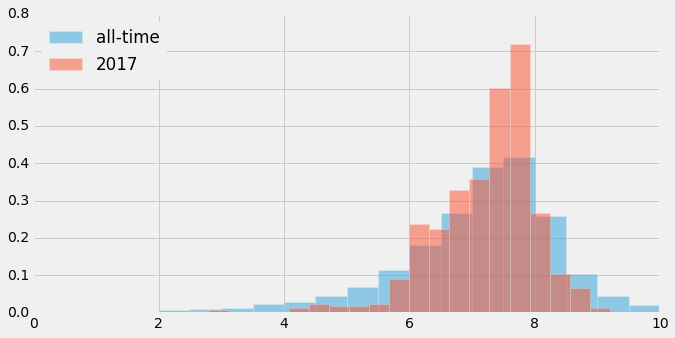

In [7]:
#plt.hist([df['scores'],presentyear['scores']],bins=20,normed=True)
#plt.legend(label=["all-time","2017"],loc="upper right")
plt.hist(df['scores'],label="all-time",normed=True,bins=20,alpha=.5)
plt.hist(presentyear['scores'],label="2017",normed=True,bins=20,alpha=.5)
plt.legend(loc="upper left")

In [8]:
df.loc[df['Release Year']!=2017,'scores'].mean()

7.028298638284524

In [9]:
presentyear['scores'].mean()

7.19785575048734

In [10]:
st.ttest_ind(presentyear['scores'],df.loc[df['Release Year']!=2017,'scores'],equal_var=False)

Ttest_indResult(statistic=4.5421404429380381, pvalue=6.769608894076431e-06)

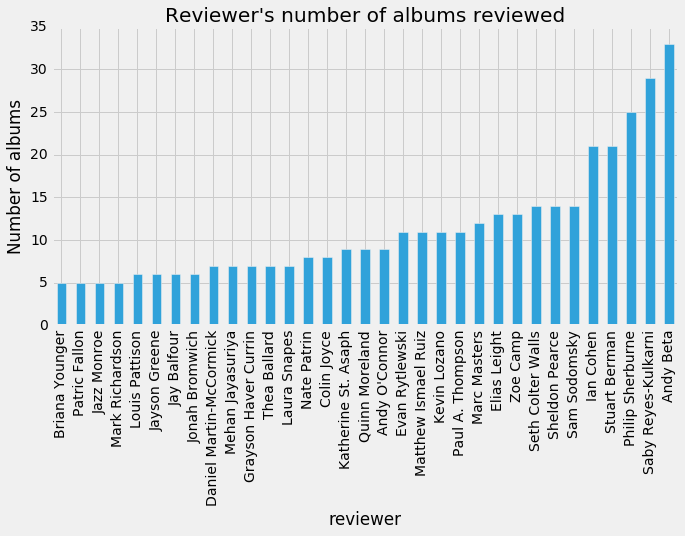

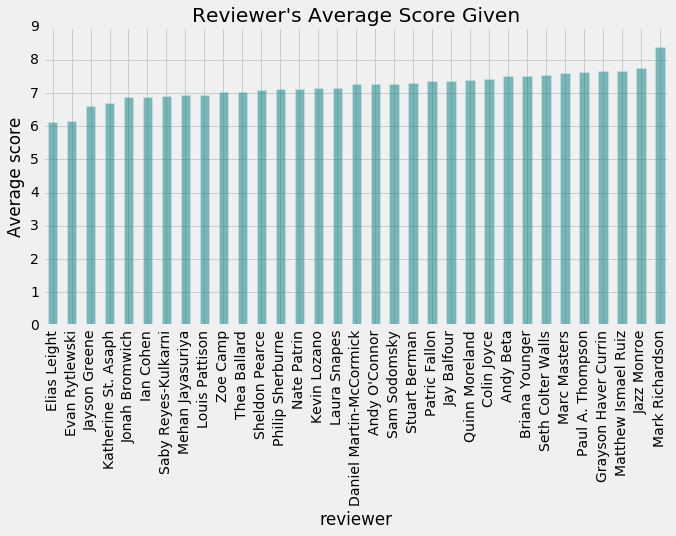

In [11]:
reviewers=presentyear.groupby('reviewer').count()[['album']].sort_values('album')
reviewers=reviewers.loc[reviewers['album']>4]
ax=reviewers.plot.bar(legend=False,title="Reviewer's number of albums reviewed")
ax.set_ylabel("Number of albums")
reviewersmean=presentyear.groupby('reviewer').mean()[['scores']]
reviewersmean=reviewersmean.loc[reviewers.reset_index()['reviewer']].sort_values('scores')
ax2=reviewersmean.plot.bar(legend=False,alpha=.5,color="teal",title="Reviewer's Average Score Given")
ax2.set_ylabel("Average score")

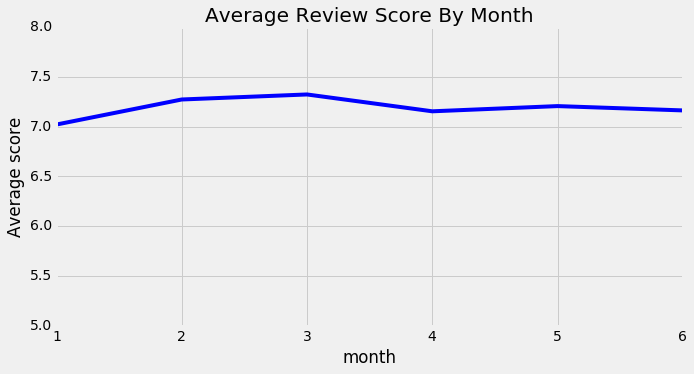

In [12]:
time=presentyear.groupby('month').mean().reset_index()
time=time.loc[time['month']!=7]
ax=time.plot(kind='line',x='month',y='scores',ylim=(5,8),title="Average Review Score By Month",legend=False,color='blue')
ax.set_ylabel("Average score")

In [13]:
st.ttest_ind(presentyear.loc[presentyear['month']==3,'scores'],presentyear.loc[presentyear['month']==1,'scores'],equal_var=False)

Ttest_indResult(statistic=2.2877696749344998, pvalue=0.023486553601043476)

In [14]:
presentyear.sort_values('scores',ascending=False).head(20)

,artists,album,genre,scores,years,labels,dates,reviewer,Release Year,day,...,Prev6,Prev7,Prev8,Prev9,Prev10,Wait,Major,MajorIndie,Label Switch,Other
11502,Kendrick Lamar,DAMN.,Rap,9.2,2017,Interscope/Top Dawg Entertainment,2017-04-18,Matthew Trammell,2017,18,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1,0,1,0
9090,Mount Eerie,A Crow Looked At Me,Rock,9.0,2017,P.W. Elverum & Sun,2017-03-24,Mike Powell,2017,24,...,7.0,8.2,7.6,7.1,6.8,2.0,0,0,0,1
1144,Various Artists,Outro Tempo: Electronic and Contemporary Music...,NaN,8.8,2017,Music From Memory,2017-03-04,Andy Beta,2017,4,...,7.8,7.2,6.2,4.8,8.4,0.0,0,0,1,1
13894,GAS,Narkopop,Electronic,8.8,2017,Kompakt,2017-04-21,Mark Richardson,2017,21,...,9.1,8.7,-1.0,-1.0,-1.0,1.0,0,0,0,1
12064,Jlin,Black Origami,Electronic,8.8,2017,Planet Mu,2017-05-18,Andrew Nosnitsky,2017,18,...,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0,0,0,1
7743,Perfume Genius,No Shape,Pop/R&B,8.8,2017,Matador,2017-05-05,Laura Snapes,2017,5,...,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,0,1,0,0
9505,Midori Takada,Through the Looking Glass,ExperimentalGlobal,8.7,2017,Palto Flats/WRWTFWW,2017-03-13,Andy Beta,2017,13,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
1013,Visible Cloaks,Reassemblage,Electronic,8.7,2017,Rvng Intl.,2017-02-20,Andy Beta,2017,20,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
4113,The Creation,Action Painting,Rock,8.7,2017,Numero Group,2017-03-18,Stephen Thomas Erlewine,2017,18,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,1
1142,Various Artists,Mono No Aware,NaN,8.6,2017,Pan,2017-04-04,Mark Richardson,2017,4,...,7.5,7.9,7.8,7.2,6.2,0.0,0,0,1,1


In [23]:
print("electronic ",presentyear.loc[presentyear['electronic']==1,'scores'].mean())
print("rock ",presentyear.loc[presentyear['rock']==1,'scores'].mean())
print("rap ",presentyear.loc[presentyear['rap']==1,'scores'].mean())
print("r&b ",presentyear.loc[presentyear['r&b']==1,'scores'].mean())
print("jazz ",presentyear.loc[presentyear['jazz']==1,'scores'].mean())
print("global ",presentyear.loc[presentyear['global']==1,'scores'].mean())
print("folk ",presentyear.loc[presentyear['folk']==1,'scores'].mean())
print("pop ",presentyear.loc[presentyear['pop']==1,'scores'].mean())
print("experimental ",presentyear.loc[presentyear['experimental']==1,'scores'].mean())
print("country ",presentyear.loc[presentyear['country']==1,'scores'].mean())

electronic  7.181443298969069
rock  7.116410256410253
rap  7.068115942028987
r&b  7.030769230769232
jazz  7.6499999999999995
global  7.516666666666666
folk  7.270588235294118
pop  7.030769230769232
experimental  7.367567567567568
country  7.270588235294118


In [20]:
print("electronic",presentyear['electronic'].sum()," pop",presentyear['pop'].sum(),"r&b",presentyear['r&b'].sum())
print("rap",presentyear['rap'].sum()," experimental",presentyear['experimental'].sum(),"rock",presentyear['rock'].sum())
print("global",presentyear['global'].sum()," folk",presentyear['folk'].sum()," country",presentyear['country'].sum())
print("jazz",presentyear['jazz'].sum())

electronic 97  pop 52 r&b 52
rap 69  experimental 74 rock 195
global 12  folk 17  country 17
jazz 12
